<a href="https://colab.research.google.com/github/DhruvPatel96/Breast-Cancer-Detction-using-machine-learning/blob/main/ML-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Breast_Clinical_Dataset.csv')
df=df.rename({"Patient's Vital Status": "Patients_Vital_Status",
              "Age at Diagnosis ": "Age_at_Diagnosis",
              "3-Gene classifier subtype": "3_Gene_classifier_subtype",
              "Mutation Count": "Mutation_Count",
              "ER Status": "ER_Status",
              "Cancer Type Detailed": "Cancer_Type_Detailed"},axis=1)

## Applying Label Encoder Technique

In [ ]:
df = df.dropna()
le = preprocessing.LabelEncoder()
df['Type of Breast Surgery'] = le.fit_transform(df['Type of Breast Surgery'])
df['Cancer Type'] =  le.fit_transform(df['Cancer Type'])
df['Cancer_Type_Detailed'] = le.fit_transform(df['Cancer_Type_Detailed'])
df['Cellularity'] =  le.fit_transform(df['Cellularity'])
df['Chemotherapy'] = le.fit_transform(df['Chemotherapy'])
df['Pam50 + Claudin-low subtype'] =  le.fit_transform(df['Pam50 + Claudin-low subtype'])
df['ER status measured by IHC'] = le.fit_transform(df['ER status measured by IHC'])
df['ER_Status'] =  le.fit_transform(df['ER_Status'])
df['Relapse Free Status'] = le.fit_transform(df['Relapse Free Status'])
df['Sample Type'] =  le.fit_transform(df['Sample Type'])
df['Sex'] = le.fit_transform(df['Sex'])
df['3_Gene_classifier_subtype'] =  le.fit_transform(df['3_Gene_classifier_subtype'])
df['Patients_Vital_Status'] = le.fit_transform(df['Patients_Vital_Status'])
df['HER2 status measured by SNP6'] = le.fit_transform(df['HER2 status measured by SNP6'])
df['HER2 Status'] = le.fit_transform(df['HER2 Status'])
df['Tumor Other Histologic Subtype'] =  le.fit_transform(df['Tumor Other Histologic Subtype'])
df['Hormone Therapy'] = le.fit_transform(df['Hormone Therapy'])
df['Inferred Menopausal State'] = le.fit_transform(df['Inferred Menopausal State'])
df['Integrative Cluster'] = le.fit_transform(df['Integrative Cluster'])
df['Primary Tumor Laterality'] =  le.fit_transform(df['Primary Tumor Laterality'])
df['Oncotree Code'] = le.fit_transform(df['Oncotree Code'])
df['Overall Survival Status'] =  le.fit_transform(df['Overall Survival Status'])
df['PR Status'] = le.fit_transform(df['PR Status'])
df['Radio Therapy'] = le.fit_transform(df['Radio Therapy'])


1092


## Input and Output Features

In [ ]:
x1=df.iloc[:,:-1]
y1=df.iloc[:,-1]

## Split training and testing Features

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x1, y1, test_size=0.2,random_state=0)

# Applying Classification Technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1, random_state=0)
rf.fit(x_train,y_train)
Y_pred = rf.predict(x_test)

## Metrics Calculation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_cm = confusion_matrix(y_test,Y_pred)
print(y_cm)
y_ac = (accuracy_score(y_test,Y_pred)*100)
print("ac of random forest classifier is" , y_ac)
errors = abs(rf.predict(x_test) - y_test)
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))

[[70  0  0]
 [15  0 37]
 [ 0  0 97]]
ac of random forest classifier is 76.25570776255708
Average Error: 0.2374 degrees.


# Applying DR method called LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
x1=lda.fit_transform(x1,y1)
print(x1)

[[ 1.98872554  1.19208731]
 [-2.94002949 -1.02484723]
 [-3.2304448  -0.47911029]
 ...
 [ 0.95996866 -2.928661  ]
 [ 1.55804537 -0.57719879]
 [ 1.9594319  -0.54060608]]


## Applying Grid Search

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x1, y1, test_size=0.2,random_state=0)
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5, 6]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=1,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## Metrics Evaluation

In [ ]:
y_rf_random = rf_random.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
y_cm = confusion_matrix(y_test,y_rf_random)
y_random_ac = (accuracy_score(y_test,y_rf_random)*100)
errors = abs(rf_random.predict(x_test) - y_test)
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print(y_cm)
print('Accuracy = {:0.2f}%.'.format(y_random_ac))
print('Improvement of {:0.2f}%.'.format( 100 * (y_random_ac - y_ac) / y_ac))

Average Error: 0.2420 degrees.
[[65  0  5]
 [ 6 30 16]
 [ 6  9 82]]
Accuracy = 80.82%.
Improvement of 5.99%.


# Data Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('Breast_Clinical_Dataset.csv')
df1=df1.rename({"Patient's Vital Status": "Patients_Vital_Status",
              "Age at Diagnosis": "Age_at_Diagnosis",
              "3-Gene classifier subtype": "Gene_classifier_subtype",
              "Mutation Count": "Mutation_Count",
              "ER Status": "ER_Status",
              "HER2 Status": "HER2_Status",
              "Radio Therapy": "Radio_Therapy",
              "Cancer Type Detailed": "Cancer_Type_Detailed"},axis=1)

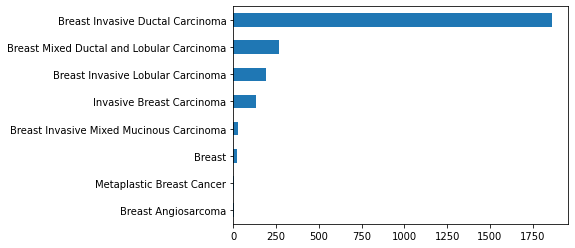

In [ ]:
df1.Cancer_Type_Detailed.value_counts().sort_values().plot(kind = 'barh')

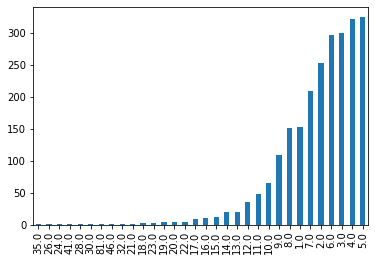

In [ ]:
df1.Mutation_Count.value_counts().sort_values().plot(kind = 'bar')

<ipython-input-13-ee169ac23ba3>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 3, 4)


Text(0.5, 1.0, 'Radio_Therapy')

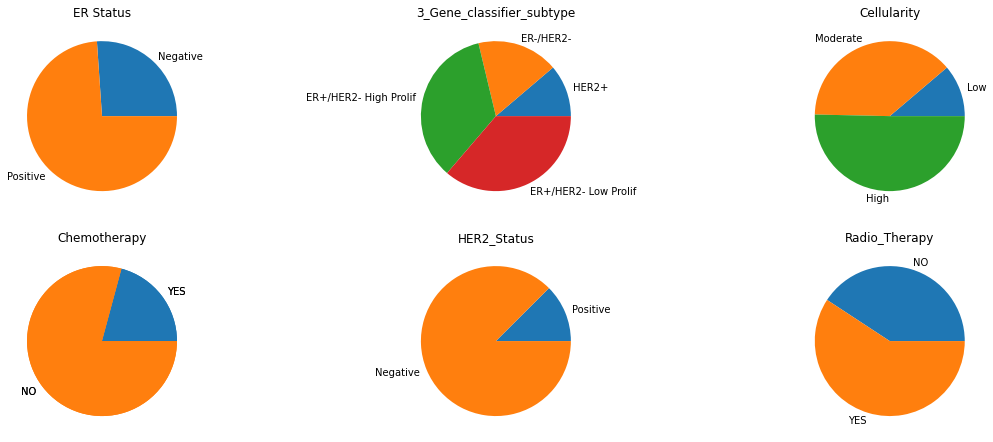

In [ ]:
plt.subplot(5, 3, 1)
df1.ER_Status.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("ER Status")
plt.subplot(5, 3, 2)
df1.Gene_classifier_subtype.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("3_Gene_classifier_subtype")
plt.subplot(5, 3, 3)
df1.Cellularity.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("Cellularity")
plt.subplot(5, 3, 4)
df1.Chemotherapy.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("Chemotherapy")
plt.subplot(5, 3, 4)
df1.Chemotherapy.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("Chemotherapy")
plt.subplot(5, 3, 5)
df1.HER2_Status.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("HER2_Status")
plt.subplot(5, 3, 6)
df1.Radio_Therapy.value_counts().sort_values().plot(kind = 'pie',figsize=(20, 20))
plt.ylabel('')
plt.title("Radio_Therapy")
